In [9]:
import numpy as np
import pandas as pd
import os 
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from tkinter import Tk
from tkinter.filedialog import askopenfilename

In [10]:
Tk().withdraw()
filename = askopenfilename()

In [11]:
warnings.filterwarnings('ignore')
df = pd.read_csv(filename)
df.head()

print(df.head())
print(df.shape)
print(df.columns)

         Date  Adj Close    Close     High      Low     Open    Volume
0  2010-01-01   0.698059  1.31728  1.31728  1.31728  1.31728         0
1  2010-01-04   0.816476  1.54074  1.56426  1.37608  1.37608  32954239
2  2010-01-05   0.822708  1.55250  1.67012  1.55250  1.58779  51377010
3  2010-01-06   0.804012  1.51722  1.56426  1.49370  1.55250  13321042
4  2010-01-07   0.853873  1.61131  1.64659  1.49370  1.51722  55977531
(2660, 7)
Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


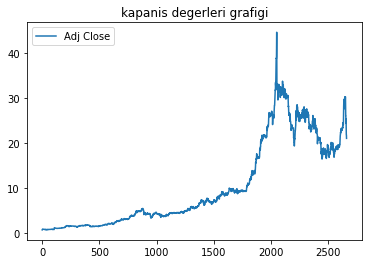

In [13]:
df[['Adj Close']].plot()
plt.title("kapanis degerleri grafigi")
plt.show()

Text(0.5, 1.0, 'Kumulatif Getirileri')

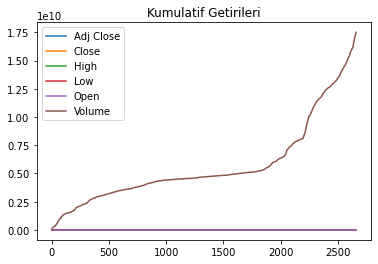

In [14]:
dr = df.cumsum()
dr.plot()
plt.title('Kumulatif Getirileri')

Text(0.5, 1.0, 'Korolasyon Grafigi')

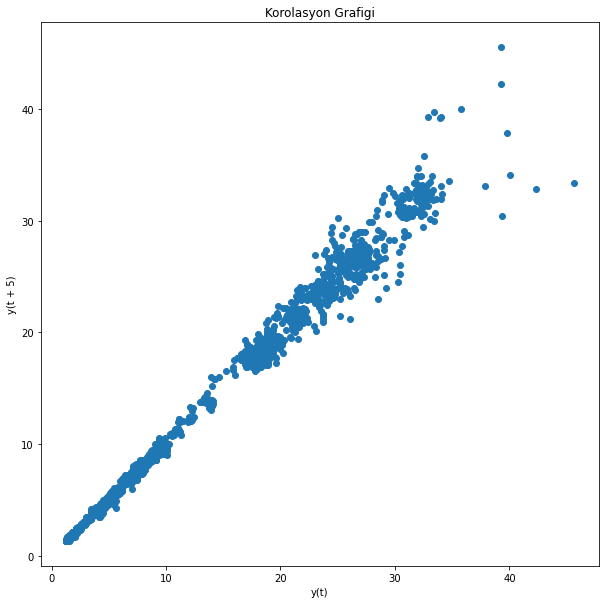

In [15]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag =5)
plt.title('Korolasyon Grafigi')

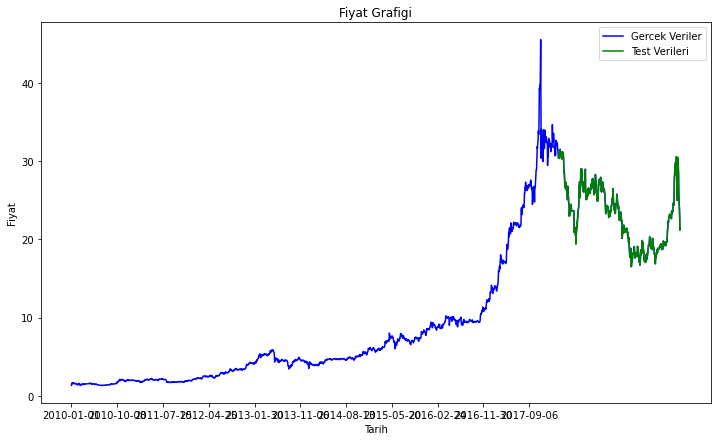

In [16]:
df['Date'][2100]
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Fiyat Grafigi')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.plot(df['Open'], 'blue', label='Gercek Veriler')
plt.plot(test_data['Open'], 'green', label='Test Verileri')
plt.xticks(np.arange(0,2100,200), df['Date'][0:2100:200])
plt.legend()

In [20]:
def sampe_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar = train_data['Open'].values
test_ar = test_data['Open'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order = (5,1,0))
    model_fit = model.fit(disp = 0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    
error = mean_squared_error(test_ar , predictions)
print('Ortalama Kareli Hatayi Test Etme : %.3f ' % error)
error2 = sampe_kun(test_ar, predictions)
print('Simetrik ortalama mutlak yuzde hatasi: %.3f' % error2)

<class 'list'>
Ortalama Kareli Hatayi Test Etme : 0.409 
Simetrik ortalama mutlak yuzde hatasi: 19.218


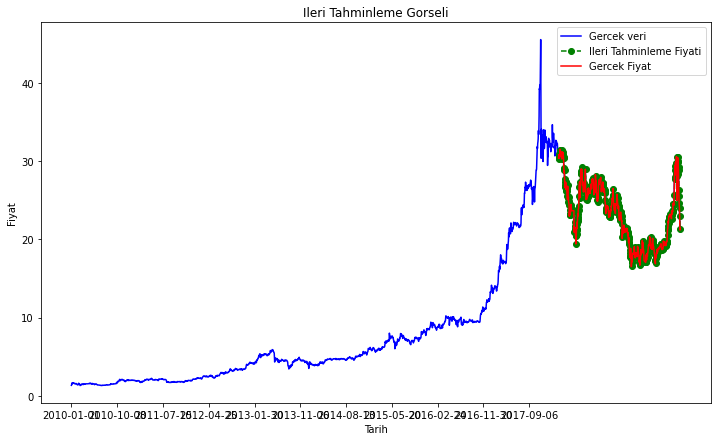

In [27]:
plt.figure(figsize  = (12,7))
plt.plot(df['Open'], 'green', color= 'blue', label='Gercek veri')
plt.plot(test_data.index, predictions, color='green', marker ='o', linestyle='dashed', 
         label='Ileri Tahminleme Fiyati')
plt.plot(test_data.index, test_data['Open'], color='red', label='Gercek Fiyat')
plt.title('Ileri Tahminleme Gorseli')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.xticks(np.arange(0,2100,200), df['Date'][0:2100:200])
plt.legend()

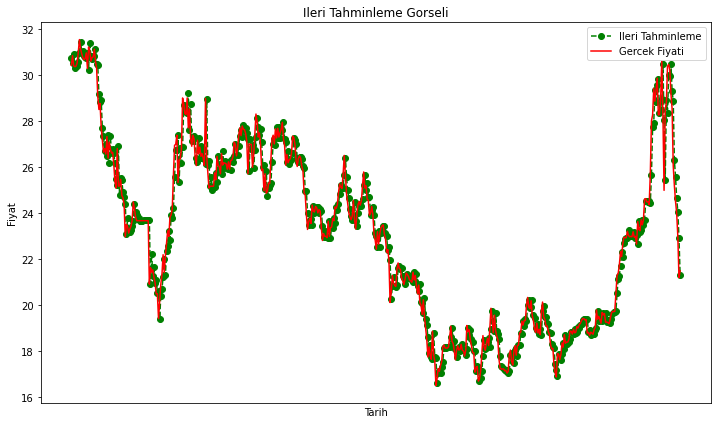

In [39]:
plt.figure(figsize = (12,7))
plt.plot(test_data.index, predictions, color= 'green', marker='o', linestyle='dashed',
        label= 'Ileri Tahminleme')
plt.plot(test_data.index, test_data['Open'], color='red', label='Gercek Fiyati')
plt.xticks(np.arange(2100,2100,50), df['Date'][2100:2100:50])
plt.title('Ileri Tahminleme Gorseli')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend()

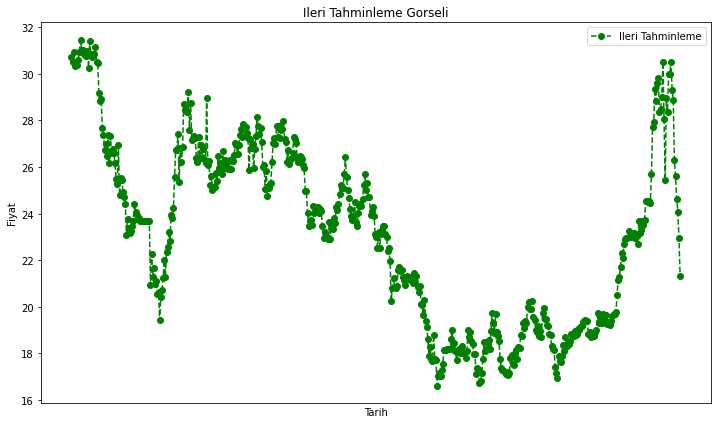

In [38]:
plt.figure(figsize = (12,7))
plt.plot(test_data.index, predictions, color= 'green', marker='o', linestyle='dashed',
        label= 'Ileri Tahminleme')
plt.xticks(np.arange(2100,2100,50), df['Date'][2100:2100:50])
plt.title('Ileri Tahminleme Gorseli')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend()